In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%config Completer.use_jedi = False

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### verificando entradas nulas

<AxesSubplot:>

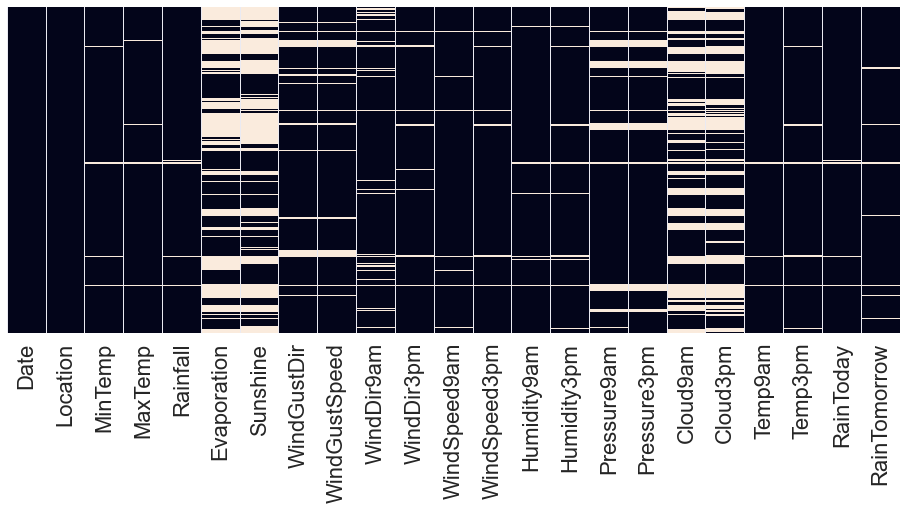

In [5]:
plt.figure(figsize=(16, 6))
sns.set(font_scale = 2)
sns.heatmap(df.isnull(), cbar=False, yticklabels =False)



In [25]:
def contagem_de_nulos(colunas):
    for coluna in colunas:
        nulos = df.isnull().sum()[coluna]
        total = df[coluna].shape[0]
        resultado = ((nulos/total)*100).round(2)
        print('porcentagem de nulo da coluna: {} {}%'.format(coluna, resultado) )

In [26]:
colunas = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [27]:
contagem_de_nulos(colunas)

porcentagem de nulo da coluna: Evaporation 43.17%
porcentagem de nulo da coluna: Sunshine 48.01%
porcentagem de nulo da coluna: Cloud9am 38.42%
porcentagem de nulo da coluna: Cloud3pm 40.81%


## dropando colunas com muitos nulos

In [39]:
df_versao1 = df.drop(columns = colunas)

## vendo correlação entre as features

<AxesSubplot:>

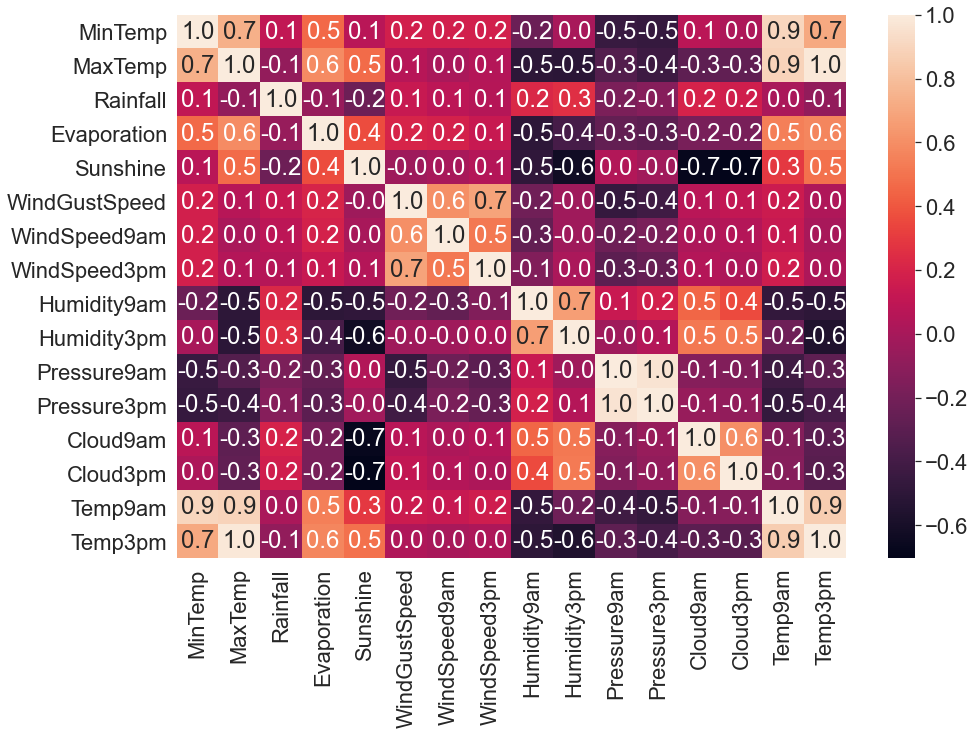

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

#### Pressure9am e Pressure3pm são redundantes assim como Temp9am e Temp3pm

<AxesSubplot:>

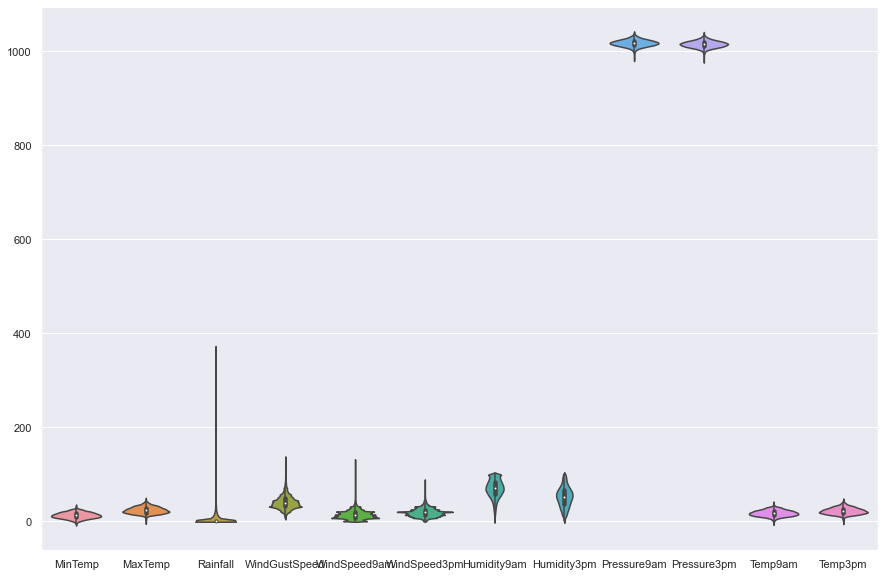

In [44]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1)
sns.violinplot(data= df_versao1)

In [60]:
df_versao_sem_data = df_versao1.drop(columns = ['Date', 'Location','WindGustDir','WindDir9am',
                                                'WindDir3pm', 'RainToday', 'RainTomorrow'])
df_versao_sem_data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
145458,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0


In [61]:
padronizador = StandardScaler()
padronizador.fit(df_versao_sem_data)
df_versao2 = padronizador.transform(df_versao_sem_data)
df_versao2 = pd.DataFrame(data = df_versao2, columns=df_versao_sem_data.keys())

<AxesSubplot:>

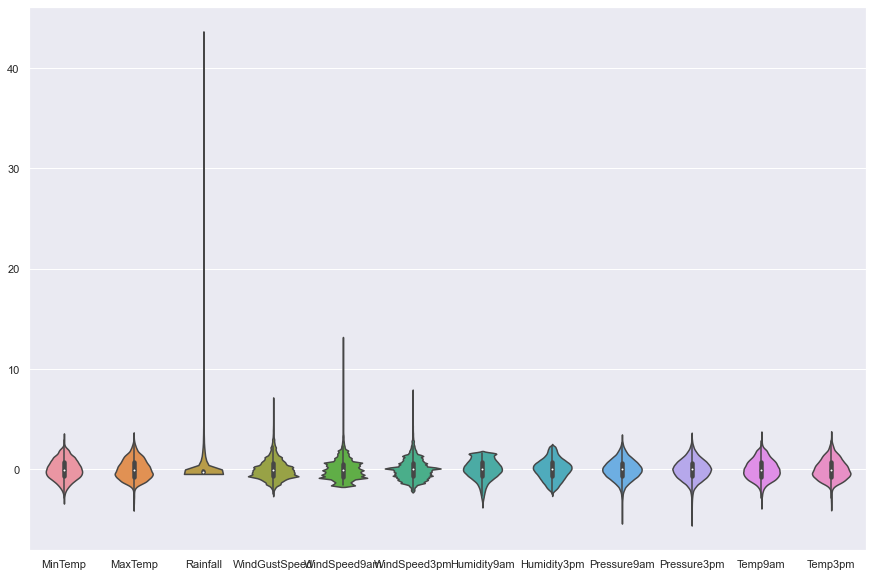

In [63]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1)
sns.violinplot(data= df_versao2)